# Create Data

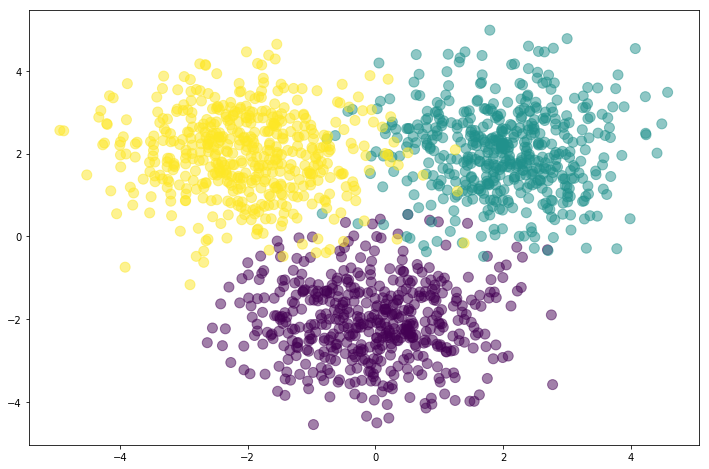

In [11]:
Nclass = 500           # create 500 examples for each class
D = 2                  # number of dimensions
M = 3                  # hidden layer size
K = 3                  # number of classes

# generating gaussian clouds & labels
X1 = np.random.randn(Nclass, 2) + np.array([0,-2])      # centered at 0, -2
X2 = np.random.randn(Nclass, 2) + np.array([2,2])       # centered at 2, 2
X3 = np.random.randn(Nclass, 2) + np.array([-2,2])      # centered at -2, 2
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)      # our target labels
N = len(Y)

T = np.zeros((N, K)) # turn Y targets into indicator variable (currently either 0, 1, 2)
for i in range(N):
    T[i, Y[i]] = 1             # this is essentially one hot encoding the targets

# lets see what data looks like
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# will start this just as we did with the forward prop - randomly initialize weights
W1 = np.random.randn(D, M)         # W1 must be equal to D x M, b/c i X is N x D
b1 = np.random.randn(M)            # b1 must be M x 1
W2 = np.random.randn(M, K)         # W2 must be N x K
b2 = np.random.randn(K)            # b2 must be K x 1

# Forward Method

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))         # we will use sigmoid in the hidden layer 
    A = Z.dot(W2) + b2                            # create output node values, passed to s-max
    expA = np.exp(A)                              # exponentiate A
    Y = expA / expA.sum(axis=1, keepdims=True)    # divide each row of expA by the rows sum
    return Y, Z                                   # return hidden layer as well

def classifcation_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

# Cross Entropy Cost

In [3]:
def cost(T, Y):
    tot = T * np.log(Y)    # direct definition of cross entropy cost
    return tot.sum()

# Derivative $\frac{\partial J}{\partial W_2}$

In [7]:
def derivative_w2_slow(Z, T, Y):
    N, K = T.shape            # get output shape from targets 
    M = Z.shape[1]            # get number of hidden units from Z
    
    # here is a slow way of doing the derivative
    ret1 = np.zeros((M,K))        # matrix to hold weight derivative matrix 
    for n in range(N):            # loop through all training examples
        for m in range(M):        # loop through all hidden layer nodes 
            for k in range(K):    # loop through all output nodes
                ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]
    return ret1

def derivative_w2(Z, T, Y):
    return  Z.T.dot(T - Y)

# Derivative $b_2$

In [8]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)     # this matrix returned will be m x 1

# Derivative $\frac{\partial J}{\partial W_1}$

In [9]:
def derivative_w1_slow(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape 
    
    # slow version 
    ret1 = np.zeros((D,M))
    for n in range(N):
        for k in range (K):
            for m in range(M):
                for d in range(D): 
                    ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])*X[n,d]
    return ret1

def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)

# Derivative $b_1$

In [10]:
def derivative_b1(T, Y, W2, Z):
    # going to do this the fast way
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [15]:
X.shape

(1500, 2)